# Парная линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задания для выполнения
1.	Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысл).

In [2]:
yndx = pd.read_csv('YNDX_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

In [3]:
res = pd.merge(sber, yndx, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20140604,0,87.81,118784670,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,YNDX,D,0,1170.0,3207


In [4]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

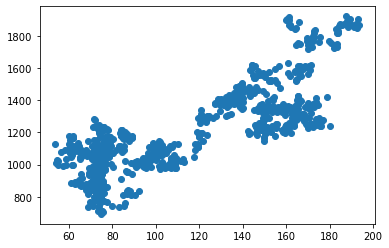

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()

2.	Построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [6]:
class Hypothesis:
    """Модель парной линейной регрессии"""
    def __init__(self, alpha: float = 0.000001, 
                 accuracy: float = 0.01, 
                 max_steps: int = 5000 ):
        self.b0 = 0
        self.b1 = 0
        self.alpha = alpha
        self.accuracy = accuracy 
        self.max_steps = max_steps
    
    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def fit(self, X, Y):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        
        while (dJ > self.accuracy) and (step < self.max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= self.alpha * dJ0
            self.b1 -= self.alpha * dJ1   
            
            old_err = new_err
            new_err = self.error(X, Y)
            dJ = abs(old_err - new_err) 
            
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

In [7]:
hyp = Hypothesis()
J = hyp.error(x, y)
print("initial error:", J)

initial error: 754518.5925656324


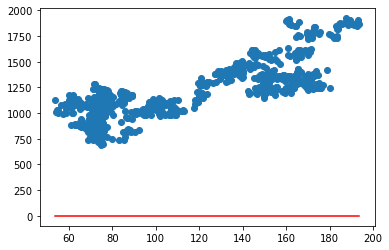

In [8]:
X0 = np.linspace(np.min(x), np.max(x), 100) 
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

3.	Оценить на графике качество построенной модели.

In [9]:
hyp = Hypothesis()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 31582.3133824434


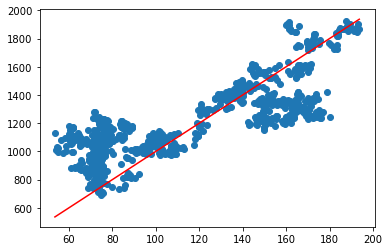

In [10]:
X0 = np.linspace(np.min(x), np.max(x), 100) 
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

4.	Построить кривые обучения.

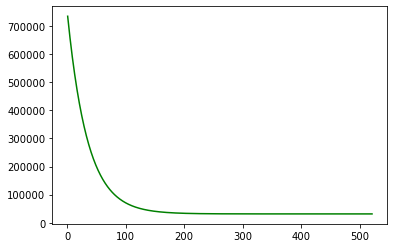

In [11]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Дополнительные задания

1.	Реализуйте механизм адаптивной скорости обучения.

2.	Постройте модель регрессии на другой паре инструментов.

In [12]:
sber = pd.read_csv('SBER_101001_171001.txt')
mvid = pd.read_csv('MVID_101001_171001.txt')
res1 = pd.merge(sber, mvid, on='<DATE>')
res1.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


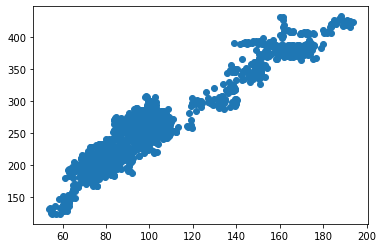

In [13]:
x1 = res1['<CLOSE>_x']
y1 = res1['<CLOSE>_y']

plt.figure()
plt.scatter(x1, y1)
plt.show()

In [14]:
hyp1 = Hypothesis()
steps1, errors1 = hyp1.fit(x1, y1)
J1 = hyp1.error(x1, y1)
print("error after gradient descent:", J1)
X01 = np.linspace(np.min(x1), np.max(x1), 100) 
Y01 = hyp1.predict(X01)

error after gradient descent: 299.1169444618946


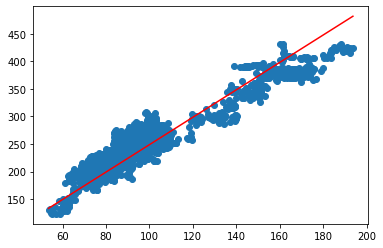

In [15]:
plt.figure()
plt.scatter(x1, y1)
plt.plot(X01, Y01, 'r')
plt.show()

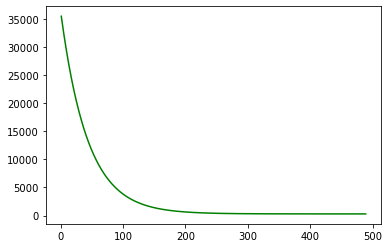

In [16]:
plt.figure()
plt.plot(steps1, errors1, 'g')
plt.show()

3.	Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке. 

In [17]:
class hyp3:
    """Модель парной линейной регрессии"""
    def __init__(self, alpha: float = 0.0001, 
                 accuracy: float = 0.001, 
                 max_steps: int = 5000):
        self.b0 = 0
        self.b1 = 0
        self.alpha = alpha
        self.accuracy = accuracy 
        self.max_steps = max_steps
    
    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):    
        return np.sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def fit(self, X, Y, train = 0.9):
        
        indexes = np.arange(X.shape[0])
        train_ind = np.random.choice(indexes, size=int(X.shape[0]*train), replace=False) 
        train_X = X[train_ind]
        train_Y = Y[train_ind]
        
        test_ind = list(set(indexes) - set(train_ind))
        test_X = X[test_ind]
        test_Y = Y[test_ind]
        
        train_errors, test_errors, steps = [], [], []
        step = 0 
        old_err_train = self.error(train_X, train_Y)
        old_err_test = self.error(test_X, test_Y)
        new_err_train = self.error(train_X, train_Y) - 1
        new_err_test = self.error(test_X, test_Y) - 1
        dJ = 1
    
        while  (dJ > self.accuracy) and (step < self.max_steps):
            dJ0 = sum(self.predict(train_X) - train_Y) / len(train_X)
            dJ1 = sum((self.predict(train_X) - train_Y) * train_X) / len(train_X)
            
            self.b0 -= self.alpha * dJ0
            self.b1 -= self.alpha * dJ1   
            
            old_err_train = new_err_train
            old_err_test = new_err_test
            new_err_train = self.error(train_X, train_Y)
            new_err_test = self.error(test_X, test_Y)
            dJ = abs(old_err_train - new_err_train) 
            
            step += 1            
            steps.append(step)
            train_errors.append(new_err_train)
            test_errors.append(new_err_test)
            
        return steps, train_errors, test_errors

In [18]:
model_3 = hyp3()
steps, train_errors, test_errors = model_3.fit(x, y)
J3 = model_3.error(x, y)
print("error after gradient descent:", J3)

error after gradient descent: 29534.21099126637


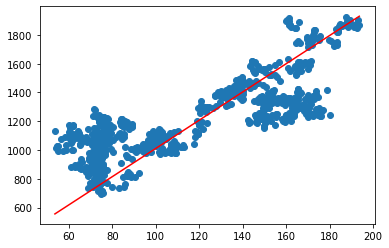

In [19]:
X0 = np.linspace(np.min(x), np.max(x), 100)
Y0 = model_3.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [20]:
train_errors

[175258.3002074108,
 60052.788553133854,
 37384.03562376835,
 32923.269134165326,
 32045.195353291423,
 31872.06976656721,
 31837.653251312935,
 31830.529821005384,
 31828.77671977026,
 31828.080318655888,
 31827.591846876232,
 31827.144296129034,
 31826.704805041558,
 31826.266907648835,
 31825.82933167568,
 31825.391826782794,
 31824.954343712066,
 31824.516872771026,
 31824.079412052353,
 31823.641961180594,
 31823.20452008169,
 31822.767088740882,
 31822.329667155125,
 31821.892255323604,
 31821.45485324604,
 31821.017460922136,
 31820.58007835172,
 31820.14270553452,
 31819.705342470363,
 31819.267989159016,
 31818.83064560026,
 31818.39331179389,
 31817.955987739686,
 31817.518673437393,
 31817.081368886844,
 31816.644074087813,
 31816.206789040054,
 31815.76951374337,
 31815.332248197537,
 31814.89499240235,
 31814.457746357566,
 31814.020510063,
 31813.58328351842,
 31813.146066723584,
 31812.708859678318,
 31812.271662382384,
 31811.834474835556,
 31811.39729703763,
 31810.960

In [21]:
test_errors

[197557.09469927393,
 46379.24899958173,
 39965.44981601288,
 28352.990946794926,
 30658.853284766858,
 29075.690376909144,
 29667.21531178329,
 29382.55076884677,
 29503.954468969383,
 29448.658597540405,
 29472.417396143584,
 29461.24158503708,
 29465.58824217497,
 29463.05456010266,
 29463.573896479094,
 29462.739181578592,
 29462.505152399437,
 29462.00469144545,
 29461.622430218944,
 29461.18775190524,
 29460.776338806885,
 29460.354619571845,
 29459.937485836923,
 29459.518331938452,
 29459.100088029034,
 29458.681454345406,
 29458.263007438818,
 29457.844491561176,
 29457.426020157447,
 29457.007542905158,
 29456.589082126113,
 29456.170627918505,
 29455.752184674253,
 29455.333750444835,
 29454.915326094317,
 29454.496911239094,
 29454.07850604898,
 29453.66011044835,
 29453.24172447045,
 29452.82334810021,
 29452.404981343963,
 29451.98662419864,
 29451.56827666529,
 29451.149938743107,
 29450.73161043212,
 29450.313291732054,
 29449.894982642665,
 29449.47668316376,
 29449.05

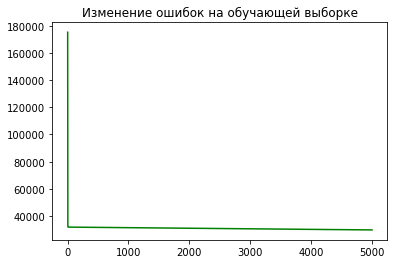

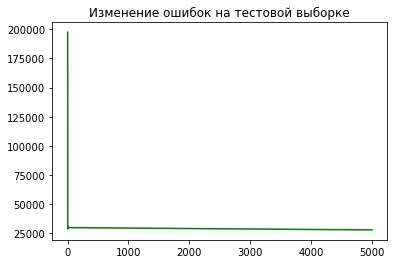

In [22]:
plt.figure()
plt.plot(steps, train_errors, 'g')
plt.title('Изменение ошибок на обучающей выборке')
plt.show()

plt.figure()
plt.plot(steps, test_errors, 'g')
plt.title('Изменение ошибок на тестовой выборке')
plt.show()

4.	Научиться использовать библиотеку sklearn для построения парной линейной регрессии:

a.	Изучить официальную документацию библиотеки sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

b.	По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств

c.	Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model_scl = LinearRegression()
model_scl.fit(x.values.reshape(-1,1), y)
J_scl = sum((model_scl.predict(x.values.reshape(-1,1)) - y)**2) / (2 * len(x)) 
print("error after gradient descent:", J_scl)
print("R2:", model_scl.score(x.values.reshape(-1,1), y))

error after gradient descent: 12156.582033390408
R2: 0.6574232077306452


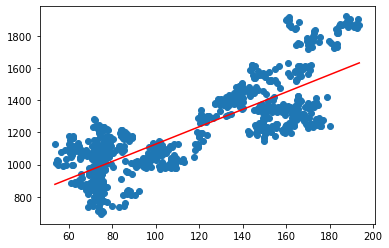

In [25]:
X0 = np.linspace(np.min(x), np.max(x), 100) 
Y0 = model_scl.predict(X0.reshape(-1,1))
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [26]:
print("error after gradient descent first:", J3)

error after gradient descent first: 29534.21099126637


In [27]:
print("error after gradient descent skl:", J_scl)
print("R2 skl:", model_scl.score(x.values.reshape(-1,1), y))

error after gradient descent skl: 12156.582033390408
R2 skl: 0.6574232077306452
